In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
data= pd.read_csv(r"C:\Users\G.Sreenivasulu\ABHI\loan_approval_project\dataset\04_Summary_dataset.csv")

In [6]:
data.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'loan_id',
       'no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status', 'total_assets', 'inc_loan', 'cibil_bucket',
       'asset_bucket', 'term_bucket', 'monthly_income', 'emi',
       'emi-to-income'],
      dtype='object')

In [7]:
x=data[['cibil_score','income_annum','loan_amount','loan_term','emi-to-income']]
y=(data['loan_status'] == "Approved").astype(int)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred),4) *100,"%")
print(classification_report(y_test,y_pred))

Accuracy: 79.27 %
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       318
           1       0.79      0.91      0.85       536

    accuracy                           0.79       854
   macro avg       0.79      0.75      0.76       854
weighted avg       0.79      0.79      0.79       854



In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

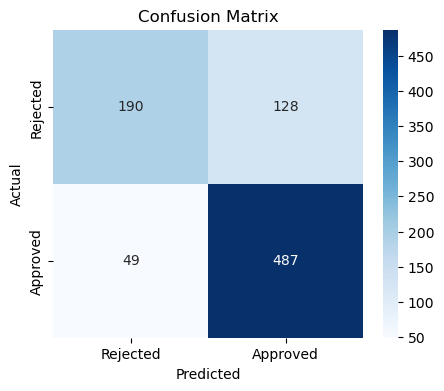

In [10]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm,annot =True, fmt='d',cmap="Blues",xticklabels=["Rejected","Approved"],yticklabels=["Rejected","Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [11]:
import joblib

In [12]:
joblib.dump(model,"loan_approval_model.pkl")

# to load it later 
# model = joblib.load("loan_approval_model.pkl")

['loan_approval_model.pkl']

FINAL OBSERVATIONS

1. CIBIL score is the strongest predictor of loan approval, with approval rates exceeding 99% beyond score 600, while remaining below 15% for scores under 500.

2. Creditworthiness dominates affordability in lending decisions, this is proved by the fact that approved loans show higher EMI-to-income ratios (57%) than rejected loans (42%).

3. Income alone is a weak differentiator, as both approved and rejected applicants show similar average income levels.

4. Asset backing moderately improves approval probability, but does not override poor credit scores.

5. Loan term length shows mild risk impact, with longer tenures slightly associated with higher rejection rates.

6. Loan term length shows mild risk impact, with longer tenures resulting in higher rejection rates.

7. Credit score distributions show clear visual separation between approved and rejected loans, confirming strong risk segmentation.